2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

In [1]:
#Imports of the numerous libraries we will need
from itertools import islice
import numpy as np
import pandas as pd
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate, cross_val_score
from math import log
import re
import xgboost as xgb

In [2]:
#Reading the files
data_folder = "challenge_data/"
trainfile = data_folder + 'train.csv'
testfile = data_folder + 'test.csv'

headers = open(trainfile).readline().strip().split(',')
data_set = pd.read_csv(trainfile)
test_set = pd.read_csv(testfile)

N = data_set.shape[0]
print("number of houses in data_set :", N)
print("number of headers :", len(headers))

number of houses in data_set : 1200
number of headers : 81


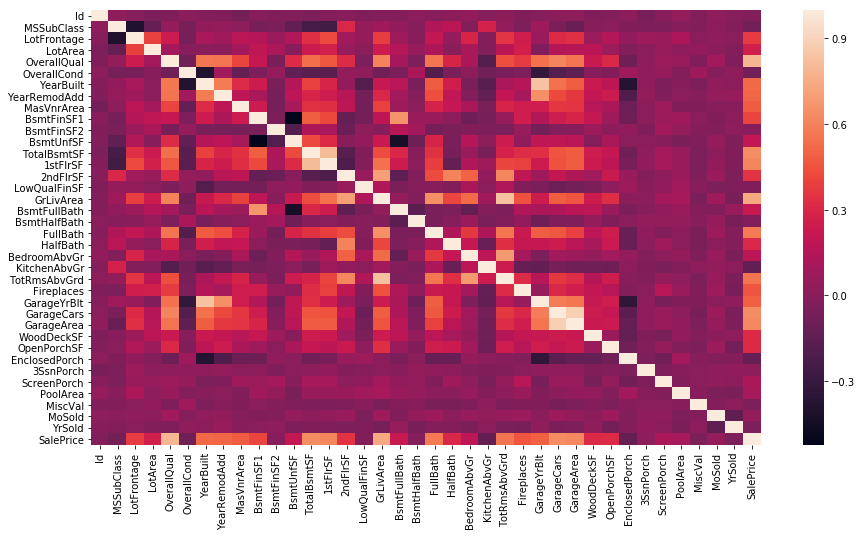

In [3]:
correlation = data_set.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation)

<div class="alert alert-info">
Let's print the correlation matrix. We are mostly interested in the last column, because it indicates the correlation with prices. The more correlated, and so the more important, seems to be overall quality and ground living area, which seems very understandable.
</div>

## Let's print the first indicators about the prices.

In [4]:
prices = data_set[headers[-1]]

print('The minimum price of a house is', min(prices), '$')
print('The maximum price of a house is', max(prices), '$')
averageSalePrice = int(sum(prices)/len(prices))
print('The average price of a house is', averageSalePrice, '$') 
print()
percentiles = [1,5,25,50,75,95,99]
print('Let\'s print some interesting percentiles.')
for p in percentiles:
    if p == 1:
        print('The', str(p), 'st percentile is', int(np.percentile(prices,p)), '$' )
    else :
        print('The', str(p), 'th percentile is', int(np.percentile(prices,p)), '$' )

The minimum price of a house is 34900 $
The maximum price of a house is 755000 $
The average price of a house is 181414 $

Let's print some interesting percentiles.
The 1 st percentile is 62369 $
The 5 th percentile is 87975 $
The 25 th percentile is 129900 $
The 50 th percentile is 163700 $
The 75 th percentile is 214000 $
The 95 th percentile is 329204 $
The 99 th percentile is 446317 $


<div class="alert alert-info">
<h3>Observations</h3><br>
We can also print the cumulative prices to see further. The result is coherent with the percentiles, we have a majority of houses (about 70-75 % ) between 100 000 \$ and 250 000 \$. The density reaches high levels between 100 000 \$ and 300 000 \$, which is coherent.
<br>
Price distribution is what we expected, and coherent with the distribution of wealth in a country such as US : the majority of people have houses with reasonnable prices, and a minority has the most expensive houses. We may have thought of more disparity knowing the american culture (for instance there is only a ratio of 2 between the 95th percentile and the median, which seems really low for a such inequal society as American), but it can be explained by the fact that all the houses are in the same little town. The prices would be much more unequal if we compared flat in Manhattan and loss in the middle of Montana.
</div>

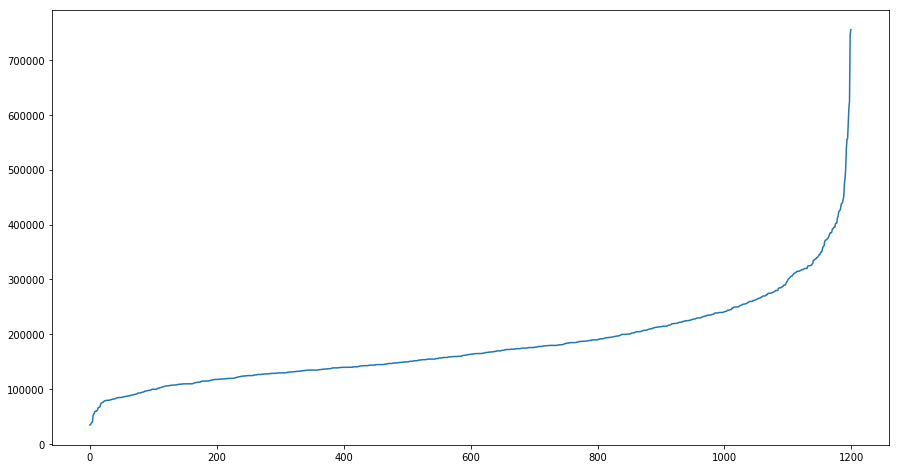

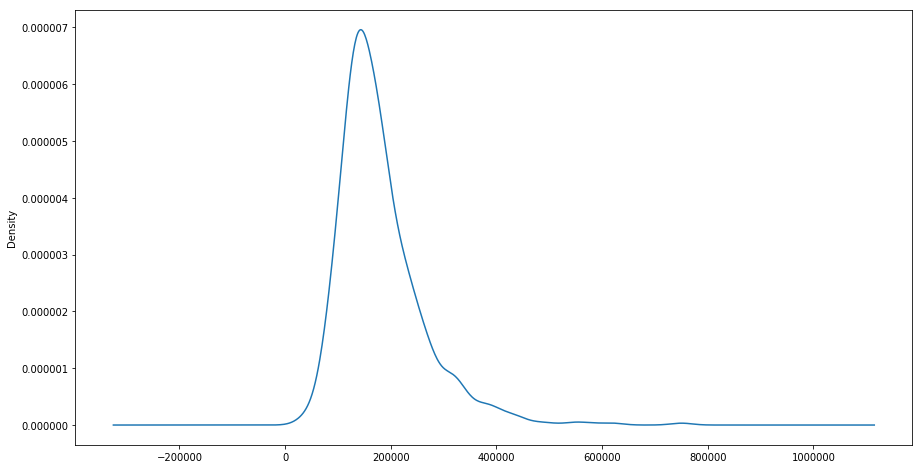

In [5]:
cumPrices = prices.sort_values()
plt.figure(figsize = (15,8))
plt.title = ("ff")
plt.plot(range(N),cumPrices)
plt.figure(figsize = (15,8))
prices.plot.density()

<div class="alert alert-block alert-success">
Now, we have to modify our datas so as to get only numerical values (so our functions can be applied to the whole dataset)

</div>

<div class="alert alert-info">
Values are of 2 types : numerical and litteral. We have to separe them to apply different treatment to each type.
</div>

In [6]:
def getlitterals(data_set, headers):
    litteralHeaders = []
    for header in headers:
        if str in map(type, data_set[header]) :
            litteralHeaders.append(header)
    return(litteralHeaders)


litteralHeaders = getlitterals(data_set, headers)     #Global variable

In [7]:
def getnumerics(data_set, headers):
    numericHeaders = []
    for header in headers:
        if (str not in map(type, data_set[header])):
            numericHeaders.append(header)
    return(numericHeaders)

numericHeaders = getnumerics(data_set, headers)       #Global variable

In [8]:
print("number of numeric headers :", len(numericHeaders))
print("number of litteral headers :", len(litteralHeaders))
print("total number of headers :", len(headers))

number of numeric headers : 38
number of litteral headers : 43
total number of headers : 81


<strong>Now, we have to clean the data, and replace the NaN values.</strong><br>
For litteral values, we only replace them with the string N (we will treat NaN such as normal values). For numerical values, we replace them with 0, because in a lot of cases it means the value is nul.

In [9]:
def remNaN(data_set):
    cleaned_data_set = data_set
    for header in numericHeaders[:-1]:
        cleaned_data_set[header] = data_set[header].fillna(0)
    for header in litteralHeaders:
        cleaned_data_set[header] = data_set[header].fillna('N')
    return(cleaned_data_set)

cleaned_data_set = remNaN(data_set)
cleaned_test_set = remNaN(test_set)

<strong>Now, we split the data_set between training_set and validation_set according to the ratio_train</strong>

In [10]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
train, validation = cleaned_data_set[:n], cleaned_data_set[n:]

<strong>And we create a dataframe containing only Ids and real prices of validation datas</strong>

In [11]:
validationPrices = validation[[headers[0], headers[-1]]]

<div class="alert alert-info">
<h2>Creation of Dictionnaries</h2><br>

So as to analyze our data, we will collect statistics about all parameters in dictionaries.
</div>

In [12]:
def getMeanPriceDict(training_set, headersToAffect = headers):
    '''Returns the dictionary that associates, for each header, a dictionary item / price.'''
    headersToAffect = headersToAffect[1:-1]
    meanPriceDictionaries = []
    for header in headersToAffect:
        intermediateData = training_set[[header, headers[-1]]].groupby(header).mean()
        meanPriceDictionaries.append((intermediateData.to_dict())[headers[-1]])
    dictionariesMeanPrices = dict(zip(headersToAffect, meanPriceDictionaries))
    return(dictionariesMeanPrices)

def getDistributionDict(training_set, headersToAffect = headers):
    '''Returns a dictionary that associates, for each header, a dictionary value / number of apparitions'''
    distributionDict = []
    headersToAffect = headersToAffect[1:-1]
    for header in headersToAffect:
        intermediateData = training_set[[header, headers[-1]]].groupby([header]).count()
        distributionDict.append((intermediateData.to_dict())[headers[-1]])
    distributionDict = dict(zip(headersToAffect, distributionDict))
    return(distributionDict)

Now that we can make dictionaries to analyse the data more precisly, let's check if our data is good for usage.

<div class="alert alert-info">
<h2>Functions to plot dictionary datas </h2><br>

So as to visualize our data, we will define some functions to plot our dictionaries: 
</div>

In [13]:
def plotbar(dictionary, name):
    if name in numericHeaders:
        array = np.array(list(dictionary.items()))
        plt.bar(array[:,0], array[:,1], align = 'center')
    else:
        plt.bar(range(len(dictionary)), list(dictionary.values()), align='center')
        plt.xticks(range(len(dictionary)), list(dictionary.keys()))

def plotline(dictionary, name):
    plt.suptitle(name)
    plt.plot(range(len(dictionary)), list(dictionary.values()))
    plt.xticks(range(len(dictionary)), list(dictionary.keys()))

<div class="alert alert-info">
<h1>Analyse of the prices and values repartition</h1>
</div>

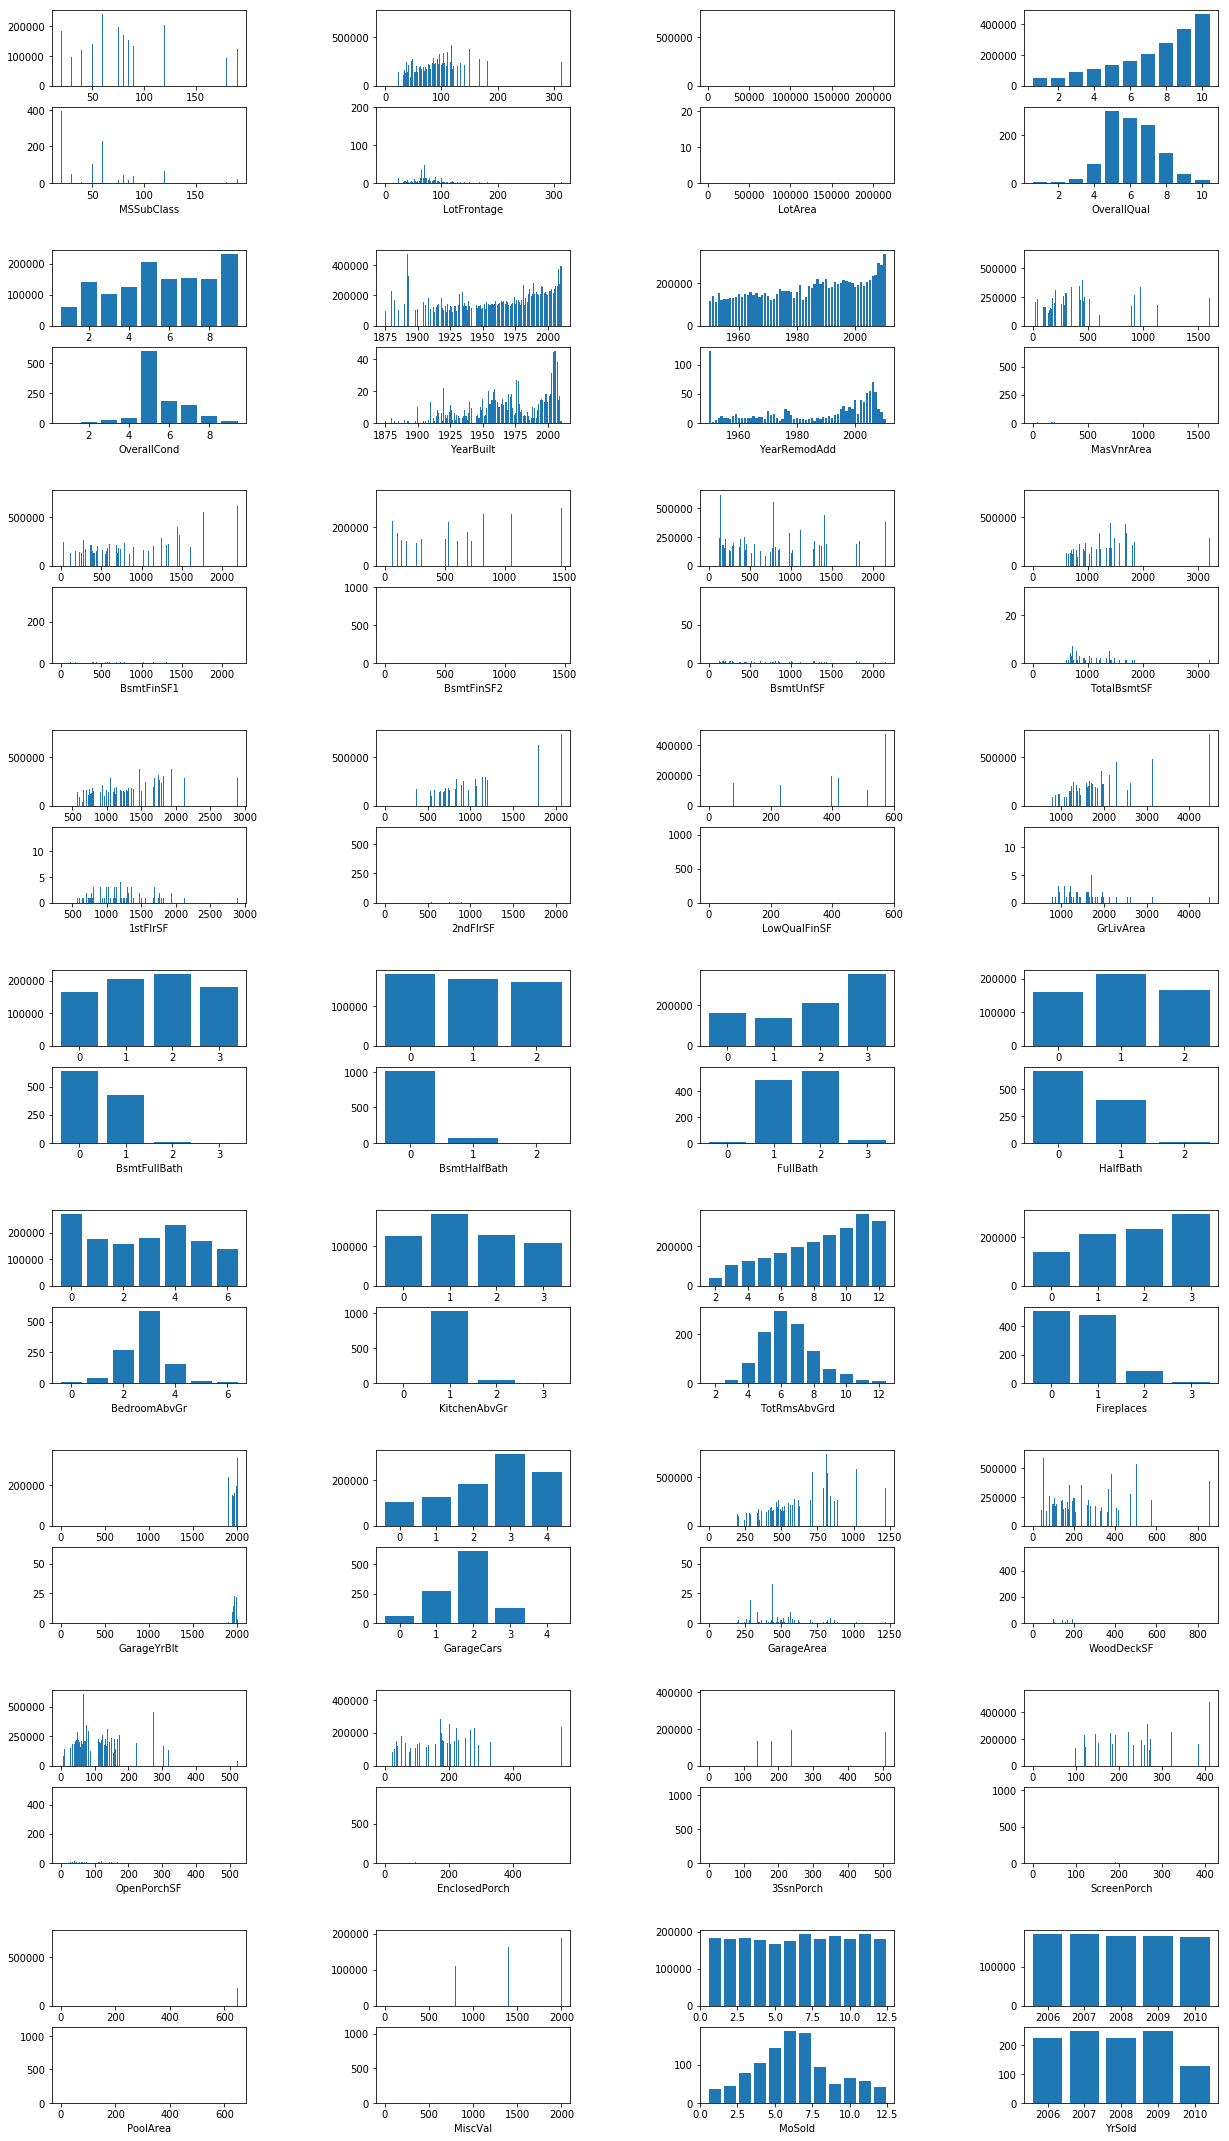

In [14]:
dictionariesMeanPricesNumeric = getMeanPriceDict(train, numericHeaders)
dictionariesDistribNumeric = getDistributionDict(train, numericHeaders)

plt.figure(figsize=(18,30))
for i in range(len(numericHeaders)-2):
    header = numericHeaders[i+1]
    x_pos = (i%4)/4
    y_pos = (i//4)/9
    plt.axes([x_pos,1-y_pos,0.15,0.035])
    plotbar(dictionariesMeanPricesNumeric[header], header)
    plt.axes([x_pos,1-y_pos-0.045,0.15,0.035])
    plotbar(dictionariesDistribNumeric[header], header)
    plt.xlabel(header)
plt.show()



<div class="alert alert-info">

<h2>How to interpret these data?</h2><br>

First, we are checking on numerical values; our results should be discrete so as to be nice for regressions (wich implies thin bars on figures, with few blanks).
<br><br>
Second, we will check on values and prices distributions, so as to find weird behaviours (considering that a weird price behaviour can be explained by a low number of examples)
<br><br>
Some of the graphs are just blanks (we don't see nothing on them). In these cases, the data is sparse enough to be considered as discrete. We can say the same for all graphs with thin bars all over the graph (as the <em>OpenPorschSF</em> or the <em>1stFloorSF</em>, which are the kind of numeric parameters we want)
<br><br>
The other parameters are more like "litteral" parameters, meaning that they have a few possible values, thus the number is not always good for regressions (such as <em>MSSubClass</em>, <em>OverallQuall</em>, <em>OverallCond</em>, <em>MoSold</em> and <em>YrSold</em>), while other parameters are just small numbers, because they represents items (like <em>GarageCars</em>, <em>Fireplaces</em>, <em>BsmtFullBath</em> ...)
<br>
Besides, <em>MoSold</em> and <em>YrSold</em> don't seem to have a huge impact on selling price, while <em>OverallQuall</em> and <em>OverallCond</em> are directly related to it.
<br><br>
Finally, the only "weird" parameter we found is <em>MSSubClass</em>, thus we will consider it as a litteral parameter, so as to replace its values.

</div>

In [15]:
if "MSSubClass" not in litteralHeaders:
    litteralHeaders.append("MSSubClass")
if "MSSubClass" in numericHeaders:
    numericHeaders.remove("MSSubClass")

print("N° of litteral headers: {0}\nN° of numeric headers: {1}\ntotal n° of headers: {2}".format(len(litteralHeaders), len(numericHeaders), len(headers)))


N° of litteral headers: 44
N° of numeric headers: 37
total n° of headers: 81


# Data Preprocessing

We need to replace litteral data by numerical ones. Thus, we plan to replace every litteral value by the average price of houses showing this parameter. This way, we ensure to keep our data "ordered" (a feature implying high house price will have a higher value than a feature implying low price)

In [16]:
def mean(L): return(sum(L)/len(L))

def getNumericDataframe(dataframe, dictionariesMeanPrices):
    '''
    Replaces all litteral values by numerical ones
    '''
    numericDF = dataframe
    for headers in litteralHeaders:
        numericDF[header]=dataframe[header].map(dictionariesMeanPrices[header]).fillna(averageSalePrice)
        #We replace all values in each header by its associated value in its header dictionary
        #Moreover, we fill the missing values by the average house price, so as to keep coherent datas.
    return(numericDF)

def dataframePreprocessing(dataframe):
    '''
    Regroups remNaN and getNumericDataFrame for data preprocessing
    '''
    dictionariesMeanPrices = getMeanPriceDict(train, headers)
    nice_dataframe = dataframe
    for header in numericHeaders:
        #For numerical headers, we just replace missing values by 0. 
        #Indeed, after having a look at the data, we observed that missing values means, in most cases, a lack.
        if header != 'SalePrice':
            nice_dataframe[header] = dataframe[header].fillna(0)
            
    for header in litteralHeaders:
        #for litteral headers, we consider missing values as a value itself
        #thus, we replace it by its corresponding value in the dictionary
        nice_dataframe[header] = dataframe[header].fillna('N')
        nice_dataframe[header] = dataframe[header].map(dictionariesMeanPrices[header]).fillna(averageSalePrice)
    return(nice_dataframe)

avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
avgTest = dataframePreprocessing(cleaned_test_set)

In [17]:
def getColumnMeanPrices(data_set, dictionariesMeanPrices):
    '''
    Returns a dictionary that associates to every column a dictionary that associates to every possible value:
        -either the average price for this value
        -either its original value (If it was already a numerical value)
    '''
    prices = data_set[headers[-1]]
    averageSalePrice = int(sum(prices)/len(prices))
    dictionaryColumnMeanPrices = {}
    for header in headers :
        column = []
        for i in (data_set[headers[0]].tolist()):
            i-=1
            if header in litteralHeaders :
                column.append(dictionariesMeanPrices[header].get(data_set[header].loc[i], 0))
                if column[-1] == 0:print("this was unexpected.")
            else :
                column.append(data_set[header].loc[i])

        dictionaryColumnMeanPrices[header] = pd.Series(column)
    return(dictionaryColumnMeanPrices)

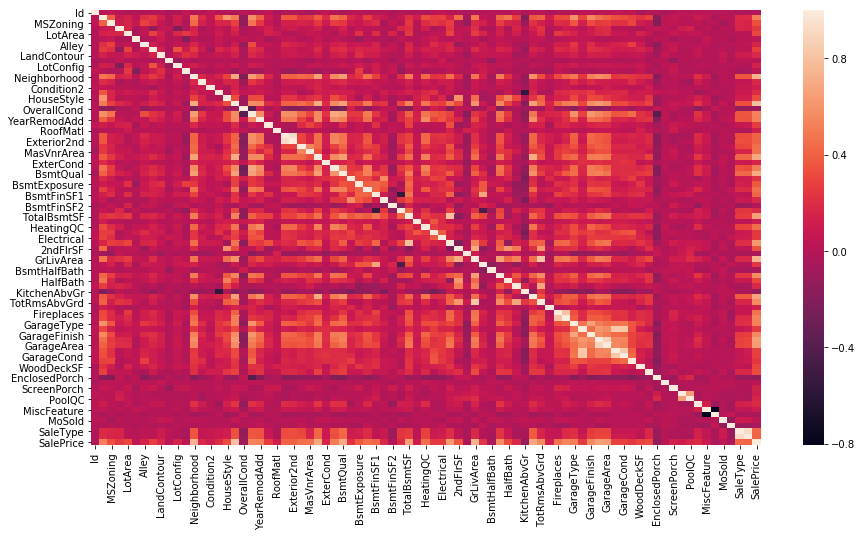

In [18]:
def getAvgTrain(train):
    '''
    Returns a new training set, that has been preprocessed
    '''
    
    dictionariesMeanPrices = getMeanPriceDict(train, headers)
    columnMeanPrices = getColumnMeanPrices(train, dictionariesMeanPrices)
    trainIds = train['Id'].tolist()
    avgTrain = pd.DataFrame({'Id': trainIds})
    for header in headers:
        avgTrain[header] = columnMeanPrices[header]
    return avgTrain

avgTrain = getAvgTrain(train)        

correlation = avgTrain.corr()
plt.figure(figsize = (15,8))
sns.heatmap(correlation)

<div class="alert alert-info">
By plotting the correlation map with all parameters, we can see that parameters seems to be correlated between each others as much as with the sale price.
</div>

In [19]:
def get_error(predictions, validations, error_list = False):
    '''
    Computes the RMSE of logs for predicted results.
    Returns either the RMSE, either the list of squared differences of logs.
    '''
    if len(predictions) != len(validations):
        print("Two dataframes does not have the same size: {0} /= {1}".format(len(predictions), len(validations)))
    
    errors = []
    for i in range(len(predictions)):
        ID = int(predictions.iloc[i]['Id'])
        predicted_price = float(predictions.loc[predictions['Id']==ID]['PredictedPrice'])
        real_price = float(validations.loc[validations['Id']==ID]['SalePrice'])
        errors.append((log(predicted_price) - log(real_price))**2)
    
    if error_list:
        return(errors)
    else:
        return (sum(errors)/(len(predictions)))**0.5

In [20]:
def get_outliers(predictions, validations, threshold):
    '''
    returns the ID of the houses we have difficulties to predict the price (ie a more than threshold log difference)
    '''
    
    if len(predictions) != len(validations):
        print("Two dataframes does not have the same size: {0} /= {1}".format(len(predictions), len(validations)))
    
    outliers = []
    for i in range(len(predictions)):
        ID = int(predictions.iloc[i]['Id'])
        predicted_price = float(predictions.loc[predictions['Id']==ID]['PredictedPrice'])
        real_price = float(validations.loc[validations['Id']==ID]['SalePrice'])
        
        if (log(predicted_price) - log(real_price))**2 > threshold :
            outliers.append(ID)
    
    return outliers

In [21]:
def ploterror(prediction, validation):
    '''
    This function plot the predicted results as a function of the real prices.
    This is helpfull to visualise the predictions and the errors
    '''
    if len(prediction) != len(validation):
        print("Two dataframes does not have the same size.")
        return(0)
    predictions = []
    reals = []
    for i in range(len(prediction)):
        ID = int(prediction.iloc[i]['Id'])
        predictions.append(float(prediction.loc[prediction['Id']==ID]['PredictedPrice']))
        reals.append(float(validation.loc[validation['Id']==ID]['SalePrice']))
    plt.figure(figsize=(10,7))
    plt.plot(reals, predictions, '.', label = 'predictions')
    plt.plot(reals, reals, color = 'g', label = 'ideal results')
    minim = min(reals)
    maxim = max(reals)
    ranger = [minim, maxim]
    plt.plot(ranger, [r*0.9 for r in ranger], ':', color = 'r', label = '10% underestimation')
    plt.plot(ranger, [r*1.1 for r in ranger], ':', color = 'y', label = '10% overestimation')
    plt.xlabel('Real price')
    plt.ylabel('Predicted price')
    plt.legend()
    plt.show()
    return()

def plot_errors(errors, validation):
    '''
    Function that plot the error as a function of the real price
    This is helfull when we want to know the prices for which each model is good
    '''    
    if len(errors) != len(validation):
        print("Two dataframes does not have the same size.")
        return(0)
    
    reals = []
    for i in range(len(validation)):
        ID = int(validation.iloc[i]['Id'])
        reals.append(float(validation.loc[validation['Id']==ID]['SalePrice']))
    plt.figure(figsize=(10,7))
    plt.xlabel('Real price')
    plt.ylabel('squared difference of logs')
    plt.plot(reals, errors, '.')
    plt.show()
    return()

In [22]:
def show_results(data_set, validation_set, validationPrices, headers_to_use, method, show = True):
    '''
    Plots the predictions and the error for a specified modelisation method, training set and set of headers.
    '''
    approximation = method(data_set, validation_set, headers_to_use)
    if show:
        print("RMSE with {0}: {1}".format(method.__name__, get_error(approximation, validationPrices)).center(100))
        ploterror(approximation, validationPrices)
        list_of_errors = get_error(approximation, validationPrices, error_list = True)
        plot_errors(list_of_errors, validationPrices)
    return get_error(approximation, validationPrices)

In [23]:
def constant_prediction (training_set, validation_set, headersToUse)  :  
    '''
    We compute the error given by a simple pricing method which consists of giving to each house the average price.
    '''
    constant_price = [averageSalePrice for i in range (len(validation_set))]
    validationIds = validation_set['Id'].tolist()
    constant_validation = pd.DataFrame({'Id': validationIds, 'PredictedPrice': constant_price})
    return constant_validation

                         RMSE with constant_prediction: 0.39678561938245027                         


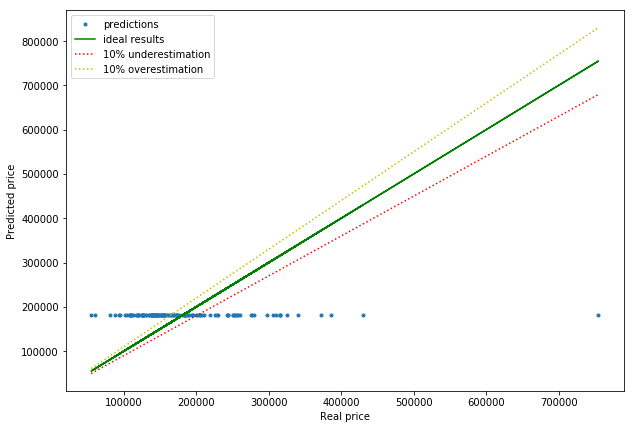

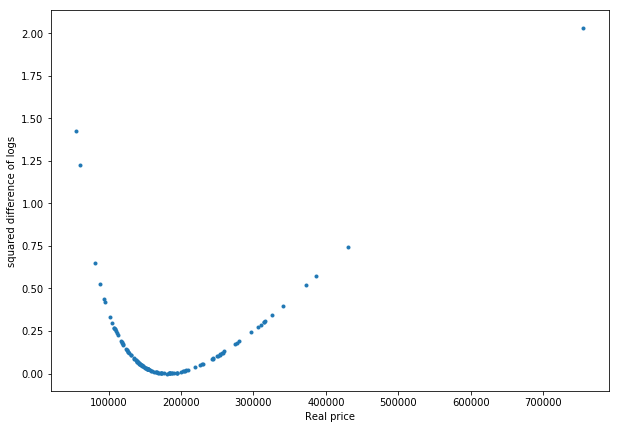

0.39678561938245027

In [24]:
show_results(train, validation, validationPrices, headers, constant_prediction)

<div class="alert alert-block alert-success">
<strong>Observations:</strong>

As expected, this method shows poor results, but this is a first prediction, and a first score to compare our other results with
</div>

# Predictions

<div class="alert alert-info">
<h2> Averaging the averages</h2>
<br>
With this simple method, we are going to:
<br>
1. Compute a price for each value of each parameters.<br>
2. Compute the average of these prices for every new house    
</div>

                                RMSE with means: 0.3335471868542516                                 


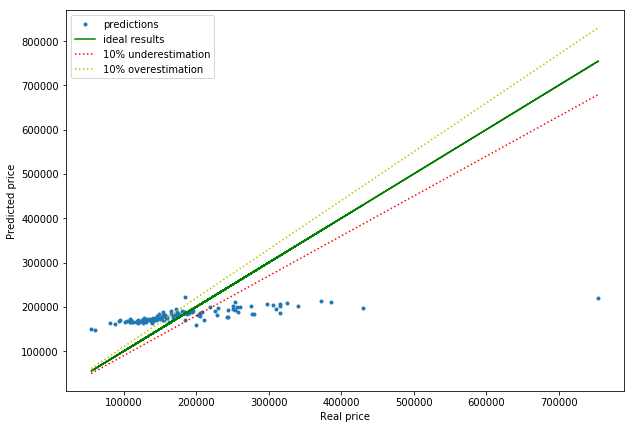

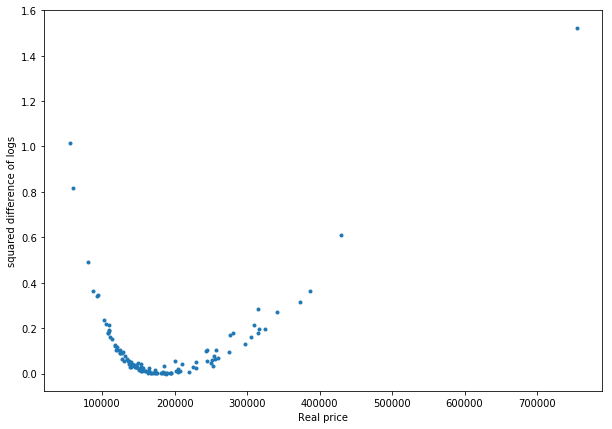

()

In [25]:
L=[[], []]
dictionariesMeanPrices = getMeanPriceDict(train, headers)
for i in range(0,len(validation)):
    test = validation.iloc[i]
    priceApprox = []
    for header in headers[1:-1]:
        value = dictionariesMeanPrices[header].get(test[header], None)
        if value != None:priceApprox.append(value)
    
    L[0].append(test['Id'])
    L[1].append(mean(priceApprox))

approximation = pd.DataFrame.from_items([('Id', L[0]), ('PredictedPrice', L[1])])
print('RMSE with means: {0}'.format(get_error(approximation, validation)).center(100))
ploterror(approximation, validation)
list_of_errors = get_error(approximation, validation[['Id', 'SalePrice']], error_list = True)
plot_errors(list_of_errors, validation)

<div class="alert alert-block alert-success">
Again, this method is much too simple to get correct results. There is a correlation between selling and predicted prices, but way to low to reach good results. Indeed, we are still using averages, thus our results are still too close from our first prediction

</div>

## Linear regression
The first, and the simpler idea we came up with, was a linear regression.

<div class="alert alert-info">
First, we just applied sklearn linear regression, on numeric, then on all headers.
</div>

In [26]:
def basic_linear_regression(training_set, validation_set, headersToUse):
    '''
    Function that makes a prediction based on linear regression on a specified set of headers.
    '''
    prices = train[headers[-1]]
    n = training_set.shape[0]
    
    regr = linear_model.LinearRegression()
    regr.fit([training_set[headersToUse].iloc[i] for i in range(n)], training_set['SalePrice'].tolist())
    L = regr.predict([validation_set[headersToUse].iloc[i] for i in range(len(validation_set))])
    #avoid negative prices
    L = [max(ele, min(prices)) for ele in L]
    
    approximation = pd.DataFrame.from_items([('Id', validation_set['Id']), ('PredictedPrice', L)])
    return(approximation)

                       ====== Regression made on NUMERIC HEADERS only ======                        
                       RMSE with basic_linear_regression: 0.19621153155940074                       


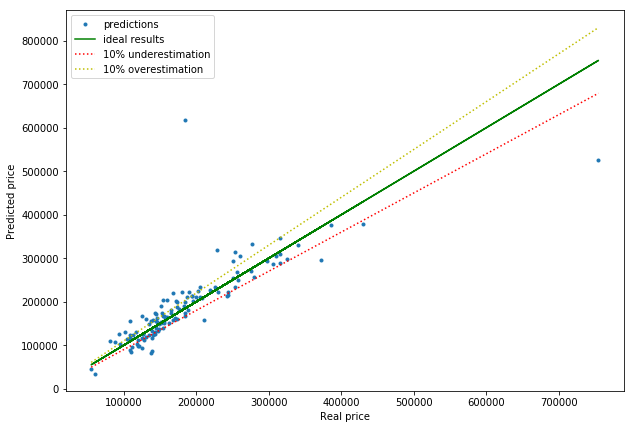

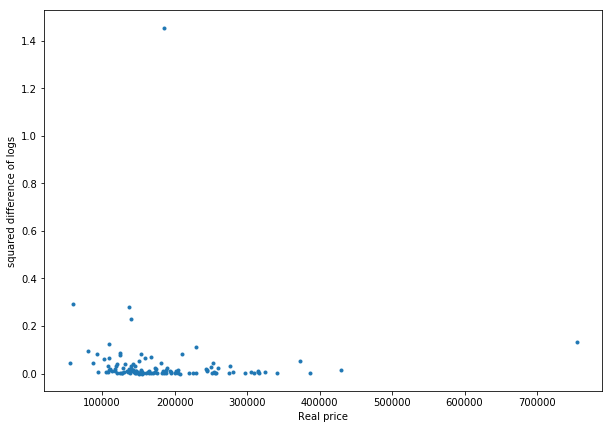

In [27]:
print('====== Regression made on NUMERIC HEADERS only ======'.center(100))
show_results(train, validation, validationPrices, numericHeaders[1:-1], basic_linear_regression)

testPrice = basic_linear_regression(avgTrain, avgTest, numericHeaders[:-1])

                            ====== Regression made on ALL HEADERS ======                            
                       RMSE with basic_linear_regression: 0.18459803988357248                       


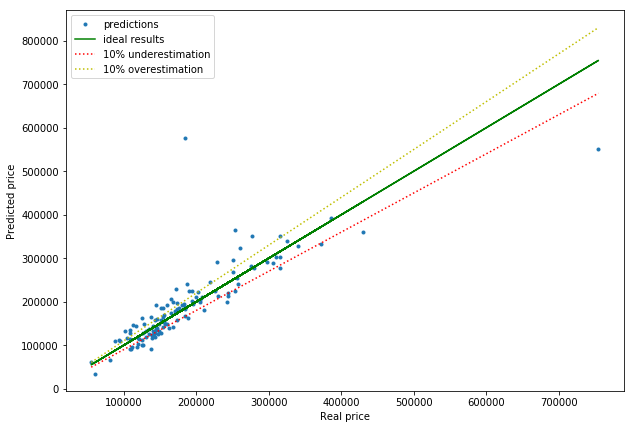

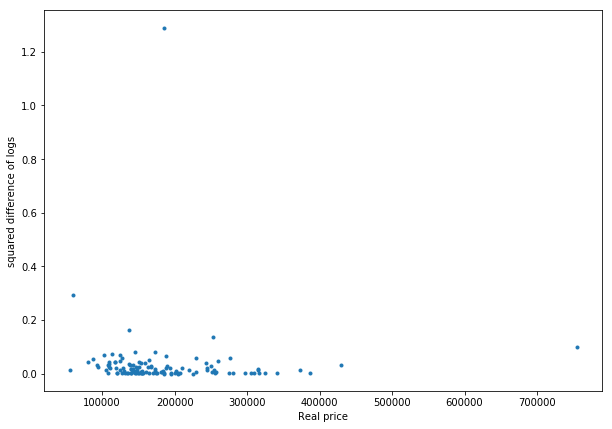

In [28]:
print('====== Regression made on ALL HEADERS ======'.center(100))
show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], basic_linear_regression)

testPrice = basic_linear_regression(avgTrain, avgTest, headers[:-1])

<div class="alert alert-block alert-success">
<h3>Commentary on first linear regression:</h3><br>
We can observe that sklearn linear regression is way better than the first methods we applied, and give good results even for price away from 200k$.

Moreover, we can observe that our RMSE is slightly better with all parameters, thus our method to replace the litteral parameters is simple, but effective.
</div>

<div class="alert alert-info">
Besides, we realized that our model tend to underestimate both low prices and high prices. That's why we came up with a little modification applied to our dataset:
</div>

In [29]:
def linear_regression(training_set, validation_set, headersToUse):
    '''
    Function that makes a prediction based on linear regression on a specified set of headers. We then reajust the results in 
    function of our observations.
    '''
    prices = train[headers[-1]]
    n = training_set.shape[0]
    
    regr = linear_model.LinearRegression()
    regr.fit([training_set[headersToUse].iloc[i] for i in range(n)], training_set['SalePrice'].tolist())
    L = regr.predict([validation_set[headersToUse].iloc[i] for i in range(len(validation_set))])
    
    #According to the plots, we underestimate a lot the price of cheapest houses. 
    #It guarantees we will not predict absurdly low prices.
    L = [max(ele,prices.quantile(0.01)) for ele in L]
    #We also get some unexpected high prices. It guarantees we do not have absurd results.
    L = [min(ele,prices.quantile(0.99)) for ele in L]
    
    low = prices.quantile(0.1)
    high = prices.quantile(0.95)
    #print(low,high)
    
    #The trickiest part : we reajust the prices in function of 2 majors bias we saw
    def reajust(ele, low, high):
        if ele < low:
            #cheapest houses are underevaluated : we raise their price by the empirical vlaue 10%
            return 1.1 * ele
        if ele > high :
            # the most expsensive houses are also underevaluated : we raise their price by one third of the difference in price
            # with the 9th decile 
            return (1+(ele-high)/(3*ele)) * ele
        else :
            return ele
        
    L = [reajust(ele, low, high) for ele in L]
    
    #In order to counterbalance a potential deviation, 
    #we multiply each price by the ratio between training prices and predicted prices
    ratio = train[headers[-1]].median() / np.median(L)
    ratio = 1
    #print(ratio)
    L = [ele * ratio for ele in L]
    
    approximation = pd.DataFrame.from_items([('Id', validation_set['Id']), ('PredictedPrice', L)])
    return(approximation)

                          ====== Regression made on NUMERIC HEADERS ======                          
                          RMSE with linear_regression: 0.17277323681775444                          


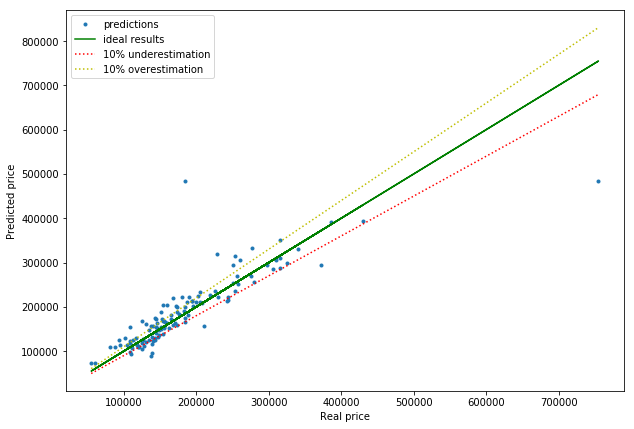

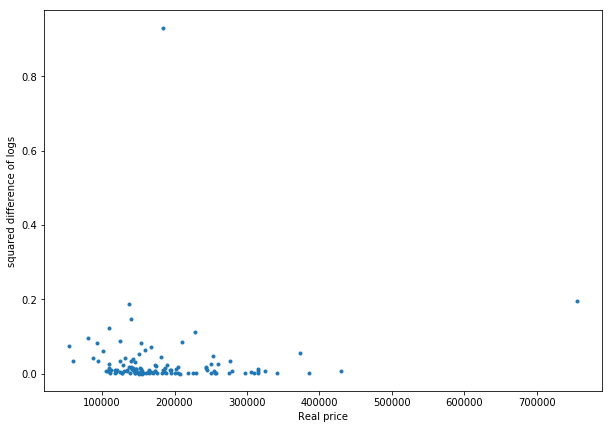

In [30]:
print('====== Regression made on NUMERIC HEADERS ======'.center(100))
show_results(train, validation, validationPrices, numericHeaders[1:-1], linear_regression)

testPrice = linear_regression(avgTrain, avgTest, numericHeaders[:-1])

                            ====== Regression made on ALL HEADERS ======                            
                          RMSE with linear_regression: 0.1676004015796963                           


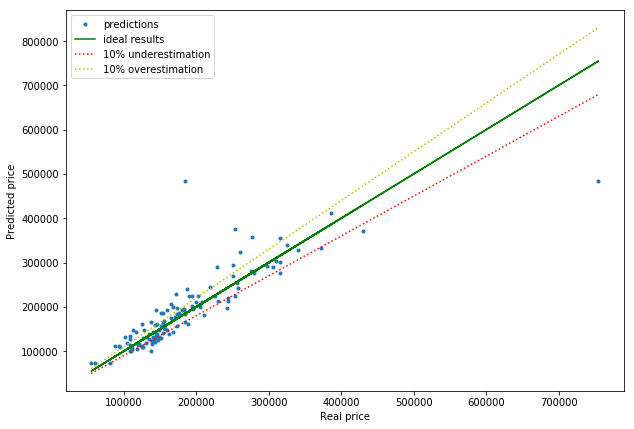

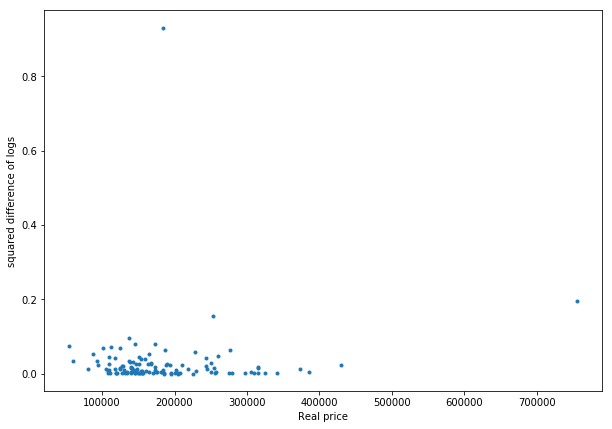

In [31]:
print('====== Regression made on ALL HEADERS ======'.center(100))
show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], linear_regression)
testPrice = linear_regression(avgTrain, avgTest, headers[:-1])

<div class="alert alert-block alert-success">

This method shows better results than the previous one.


</div>

<div class="alert alert-info">
After that, we though that some parameters could modify the prediction in a bad way (some features are not diversified enough), thus we tried to train our model (the upgraded one) only on more correlated headers:
</div>

In [32]:
def getKMoreCorrelated(k, training_set):
    correlation = training_set.corr()[headers[-1]]
    sorted_correlation = correlation.sort_values(ascending=False)
    kMoreCorrelated = sorted_correlation.iloc[1:k+1].index
    return kMoreCorrelated

                    ====== Regression made on 10 MORE CORRELATED HEADERS ======                     
                          RMSE with linear_regression: 0.1845331537516441                           


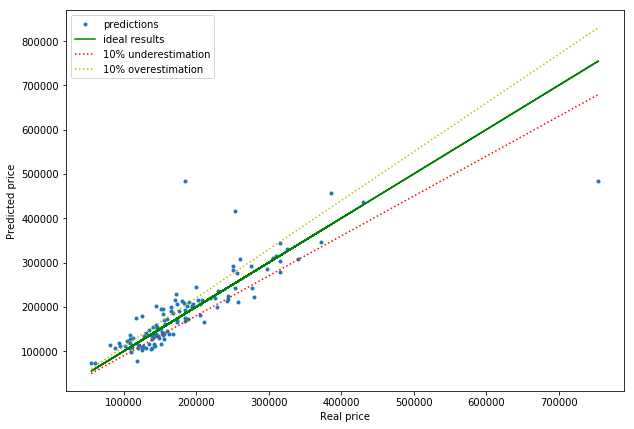

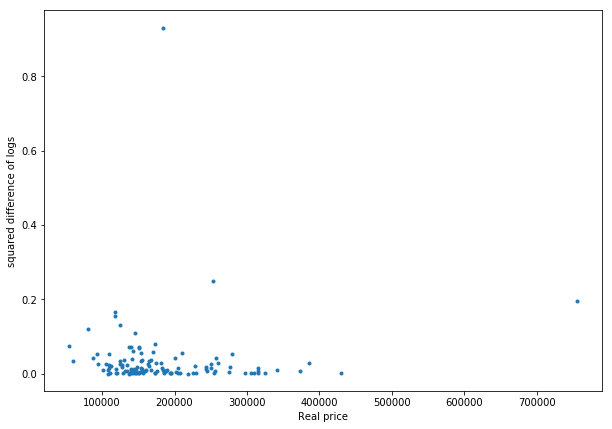

                    ====== Regression made on 15 MORE CORRELATED HEADERS ======                     
                          RMSE with linear_regression: 0.18325046406210854                          


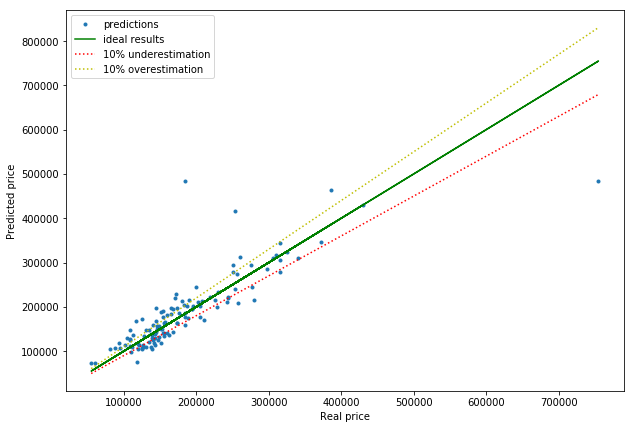

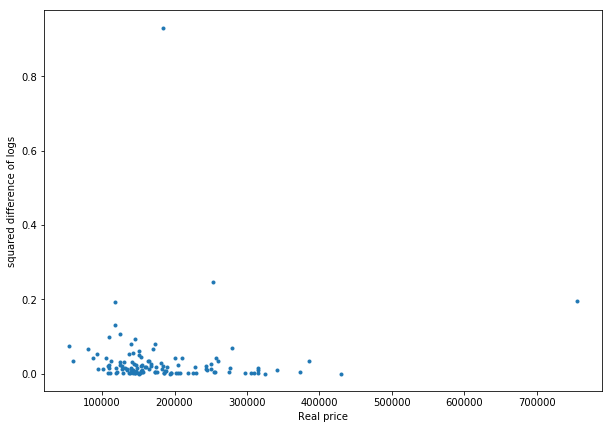

                    ====== Regression made on 20 MORE CORRELATED HEADERS ======                     
                          RMSE with linear_regression: 0.17716980911247288                          


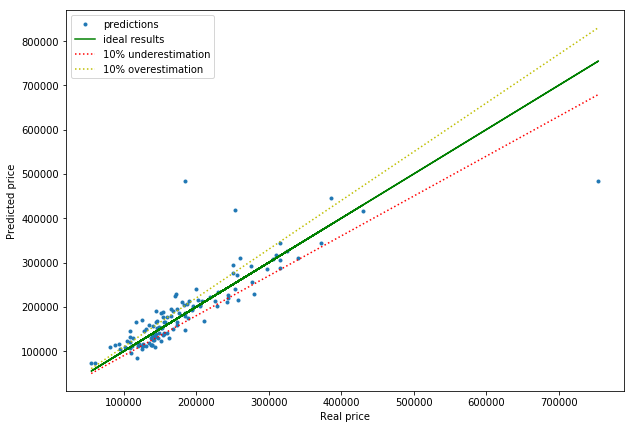

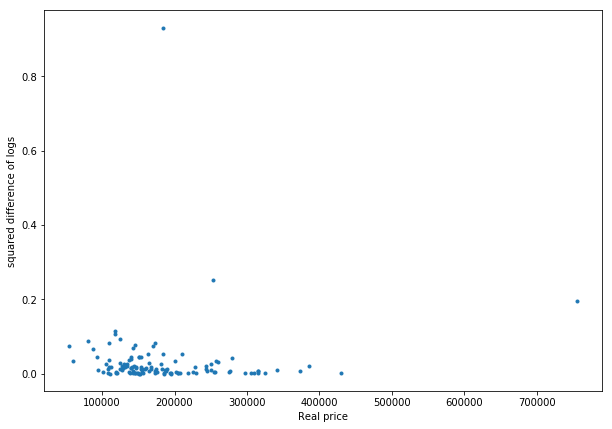

0.17716980911247288

In [33]:
print('====== Regression made on 10 MORE CORRELATED HEADERS ======'.center(100))
show_results(avgTrain, avgValidation, validationPrices, getKMoreCorrelated(10, avgTrain), linear_regression)

print('====== Regression made on 15 MORE CORRELATED HEADERS ======'.center(100))
show_results(avgTrain, avgValidation, validationPrices, getKMoreCorrelated(15, avgTrain), linear_regression)

print('====== Regression made on 20 MORE CORRELATED HEADERS ======'.center(100))
show_results(avgTrain, avgValidation, validationPrices, getKMoreCorrelated(20, avgTrain), linear_regression)

<div class="alert alert-block alert-success">

Even if the results are pretty good, this is still not better than the regression on all parameters.
Our conclusion is that we cannot reduce our data_set to the 10, 15, or 20 more correlated header, because it would make us lose informations


</div>

<div class="alert alert-info">
<h2> Cross Validation</h2><br>
We run the four different algorithms (regression on numerics headers only vs on all headers, and basic linear regression vs corrected one) a lot of times, to see which one has the best average results.
</div>

In [34]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

Results = [0,0,0,0]

T = 50
for i in range(T):
    if i%10==0:print("iteration {0} on {1}".format(i, T))
    cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
    train, validation = cleaned_data_set[:n], cleaned_data_set[n:]
    validationPrices = validation[[headers[0], headers[-1]]]
    avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
    avgTrain = getAvgTrain(train)
    Results[0] += show_results(train, validation, validationPrices, numericHeaders[1:-1], basic_linear_regression, False)
    Results[1] += show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], basic_linear_regression, False)
    Results[2] += show_results(train, validation, validationPrices, numericHeaders[1:-1], linear_regression, False)
    Results[3] += show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], linear_regression, False)
print('\n')
print([ele/T for ele in Results])
print("Average RMSE with basic_linear_regression and only numeric parameters", Results[0]/T)
print("Average RMSE with basic_linear_regression and all parameters", Results[1]/T)
print("Average RMSE with corrected linear_regression and only numeric parameters", Results[2]/T)
print("Average RMSE with corrected linear_regression and all parameters", Results[3]/T)

iteration 0 on 50
iteration 10 on 50
iteration 20 on 50
iteration 30 on 50
iteration 40 on 50


[0.18006769384662868, 0.20763037928651404, 0.15798667793048526, 0.1481936278825733]
Average RMSE with basic_linear_regression and only numeric parameters 0.18006769384662868
Average RMSE with basic_linear_regression and all parameters 0.20763037928651404
Average RMSE with corrected linear_regression and only numeric parameters 0.15798667793048526
Average RMSE with corrected linear_regression and all parameters 0.1481936278825733


<div class="alert alert-block alert-success">

The best result is obtained with the fourth combination of parameters (ie : linear regression, and all headers). It will be the one we retain for the following. By now, the error is about **0.148**. We note that we get bad results for basic linear regression on all parameters, because we sometimes get aberrant predictions (of magnitude 10^12 with this method).
</div>

<div class="alert alert-info">
<h2>Pruning</h2><br>
Now, we will try to prune our data, by deleting the ones too difficult to predict (ie : the ones where the predicted price deviating from more than 25% from the real price). We use the method basic_linear_regression which is not corrected by hand, and so is more able to detect outliers.
</div>

In [35]:
def prune_data_set(cleaned_data_set, T, threshold):
    pruned_data_set = cleaned_data_set
    for i in range(T):    
        N = pruned_data_set.shape[0]
        ratio_train = 0.9
        n = int(N*ratio_train)
        #First, we preprocess the datas, so as to get different training and validation sets
        pruned_data_set = sklearn.utils.shuffle(pruned_data_set)
        train, validation = pruned_data_set[:n], pruned_data_set[n:]
        validationPrices = validation[[headers[0], headers[-1]]]
        avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
        avgTrain = getAvgTrain(train)
        #Then we make a prediction
        approximation = basic_linear_regression(avgTrain, avgValidation, headers[:-1])
        outliers = get_outliers(approximation, validationPrices, threshold)
        if get_error(approximation, validationPrices) < 0.25 : # avoid absurd results that occurs sometimes
            print('We take back', len(outliers), 'outlier(s) at this stage')
            for outlier in outliers :
                pruned_data_set = pruned_data_set[pruned_data_set['Id'] != outlier]

    return pruned_data_set

print('==== Original size of the data_set :', cleaned_data_set.shape[0])
pruned_data_set = prune_data_set(cleaned_data_set, 20, 0.18)
print ('==== New size of the data_set :', pruned_data_set.shape[0])

==== Original size of the data_set : 1200
We take back 1 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 4 outlier(s) at this stage
We take back 3 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 5 outlier(s) at this stage
We take back 3 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 4 outlier(s) at this stage
We take back 3 outlier(s) at this stage
We take back 11 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 10 outlier(s) at this stage
We take back 9 outlier(s) at this stage
==== New size of the data_set : 1139


<div class="alert alert-info">

We cross_validate, using the pruned data set as training set, but not as validation, to avoid overfitting.
</div>

In [36]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

RMSE = 0

T = 20
for i in range(T):
    if i%10==0: print('iteration {0} on {1}'.format(i, T))
    cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
    pruned_data_set = sklearn.utils.shuffle(pruned_data_set)
    train, validation = pruned_data_set[:n], cleaned_data_set[n:]
    validationPrices = validation[[headers[0], headers[-1]]]
    avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
    avgTrain = getAvgTrain(train)
    RMSE += show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], linear_regression, False)
print("RMSE using pruned_data_set as training set:", RMSE/T)

iteration 0 on 20
iteration 10 on 20
RMSE using pruned_data_set as training set: 0.13397241332457646


<div class="alert alert-block alert-success">
The results are sometimes sligthly improved, but on average, they are a bit above the previous scores. Thus, we will consider pruned data instead of initial ones 
</div>

<div class="alert alert-info">
<h2> K Nearest Neighbours</h2><br>

We also thought to use a K Nearest Neighbours algorithm. The idea is to compute the 'distance' between the house to predict, and other houses, and to assign it the price of houses with the most similarities. The main difficulty of this approach is to define a metric.
</div>

In [37]:
def getCoeffs(K, training_set):
    '''
    Function to get the coefficients associated to each header. We have to create them, because the different columns do
    not have the same scale, and the same correlation with price.
    '''
    kMoreCorrelated = getKMoreCorrelated(20, training_set)
    correlation = training_set.corr()[headers[-1]] #correlation with price
    coeff = {}
    for header in kMoreCorrelated:
        mean = np.mean(training_set[header]) #to normalise approximatively each column
        coeff[header] = 1/(mean+1) *correlation[header] #we multiply by the correlation because it is more important to
        # be close in a high correlated column
    return coeff

coeffs = getCoeffs(10, avgTrain)
print(coeffs) #Test to check the magnitude of our coefficient

{'ExterQual': 3.659911124724217e-06, 'GarageType': 2.6804529824004402e-06, 'YearRemodAdd': 0.000251496606910068, 'TotalBsmtSF': 0.0005963108423733412, 'Fireplaces': 0.2778147978083707, 'YearBuilt': 0.0002567906822493679, 'GarageCars': 0.23021172635585704, 'BsmtQual': 3.647649688848542e-06, 'GarageFinish': 2.912364449663428e-06, 'GarageArea': 0.0012978066208913386, 'OverallQual': 0.11000107398188293, 'TotRmsAbvGrd': 0.07242692177282369, 'FullBath': 0.21726293982387668, 'Foundation': 2.665108144601788e-06, 'GrLivArea': 0.0004835758988055517, 'KitchenQual': 3.62911509712837e-06, 'FireplaceQu': 2.8370677275838986e-06, '1stFlrSF': 0.000525977775109953, 'MSSubClass': 2.64614070345026e-06, 'Neighborhood': 3.94560275031939e-06}


<div class="alert alert-block alert-success">
We can see that our coefficients are ranging from 0.1 to 2e-06. Indeed, some of the values given to the parameters are ranging from 1 to 10, while some other values have been replaced by average prices (approx 100 000), thus, it is logical to have such differences between coefficients.
</div>

In [38]:
def getKNearestNeighbours(K, training_set, test_sample, coeffs):
    '''
    function to get the K Nearest Neighbours of a house, based on metric defined by coeffs. We only compute the distance on the
    most correlated headers, in order to accelarate the computation.
    '''
    distances = []
    kMoreCorrelated = getKMoreCorrelated(20, training_set)
    for i in range(n):
        distance = 0
        for header in kMoreCorrelated:
            distance += abs(training_set[header].iloc[i] - test_sample[header]) * coeffs[header] #Manhattan distance
            #print((abs(training_set[header].iloc[i] - test_sample[header])) * coeffs[header])
        distances.append([i,distance])
    distances.sort(key = lambda ele : ele[1]) #We sort the training houses by their distance
    return distances[:K]

print(getKNearestNeighbours(10, avgTrain, avgValidation.iloc[2], coeffs))

[[954, 0.9762781934604107], [524, 1.0344092059596126], [122, 1.0436369115209936], [352, 1.058830141085077], [934, 1.0779980391513904], [161, 1.0819911414090406], [563, 1.1019195879926145], [42, 1.1206303760548526], [647, 1.1221337000216969], [337, 1.124598446681069]]


In [39]:
def makePrediction(Ks, training_set, test_set):
    '''
    predict prices with the KNN algorithm - based on two methods.
    '''
    K = Ks[-1] #last k of the row, the biggest
    l = test_set.shape[0]
    coeffs = getCoeffs(20, training_set)
    predictionOne = [[] for k in Ks] #the median of the prices
    predictionTwo = [[] for k in Ks] #the mean of the prices without the outliers
    for j in range(l):
        if j%10 == 0 :
            print('item {0} on {1}'.format(j, l))
        test_sample = test_set.iloc[j]
        KNN = getKNearestNeighbours(K, training_set, test_sample, coeffs)
        for i in range(len(Ks)):
            k = Ks[i]
            kNN = KNN[:k]
            prices = [training_set[headers[-1]].iloc[neighbour] for neighbour in [row[0] for row in kNN]] #We get 
            #the prices associated with the houses
            
            pricess = np.asarray(prices)
            price = np.median(pricess) #we take the median of the k prices
            predictionOne[i].append(price)

            prices.sort()
            out = int(k/5) #number of outliers to eliminate. We fix an arbitrary ratio of 20% to eliminate on both extrema.
            prices = prices[out:-out]
            prices = np.asarray(prices)
            price = np.mean(prices) #mean of the prices, excepted the outliers
            predictionTwo[i].append(price)
    
    approximationOne = []
    approximationTwo = []
    for i in range(len(Ks)):
        approximationOne.append(pd.DataFrame.from_items([('Id', validation['Id']), ('PredictedPrice', predictionOne[i])]))
        approximationTwo.append(pd.DataFrame.from_items([('Id', validation['Id']), ('PredictedPrice', predictionTwo[i])]))

    return [approximationOne, approximationTwo]

item 0 on 120
item 10 on 120
item 20 on 120
item 30 on 120
item 40 on 120
item 50 on 120
item 60 on 120
item 70 on 120
item 80 on 120
item 90 on 120
item 100 on 120
item 110 on 120
RMSE with 5 NN , average of the prices, outliers excluded : 0.13957916387064603


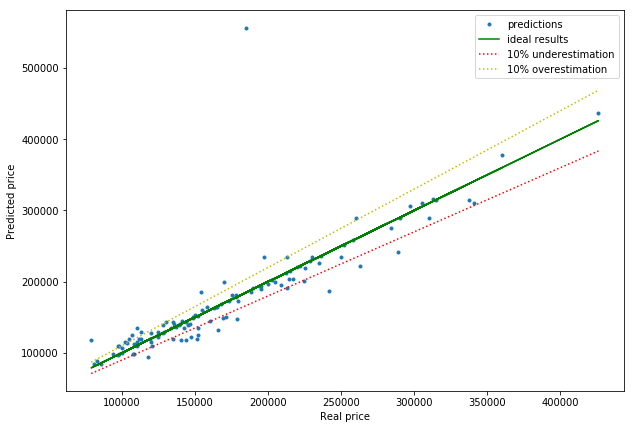

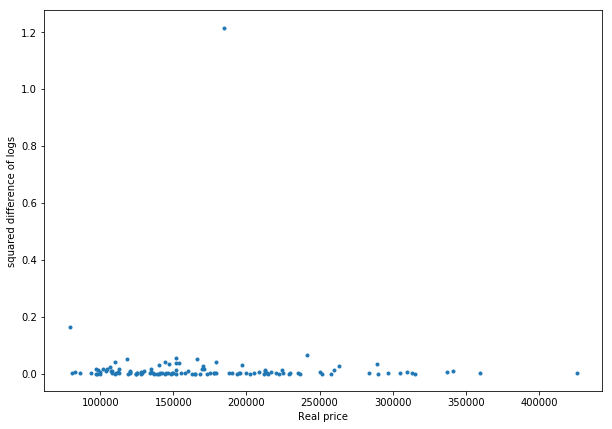

RMSE with 10 NN , average of the prices, outliers excluded : 0.15865154529458375


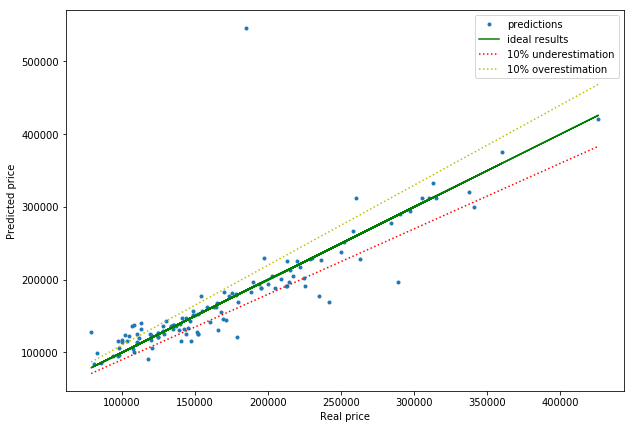

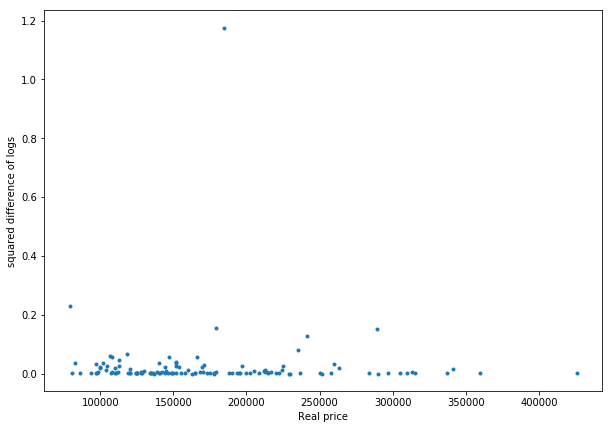

RMSE with 15 NN , average of the prices, outliers excluded : 0.15362529978179634


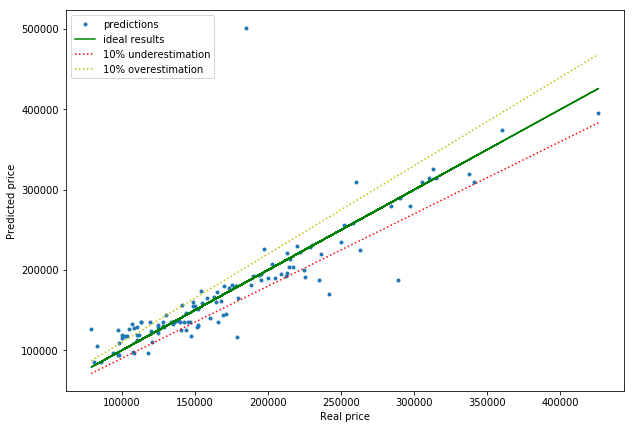

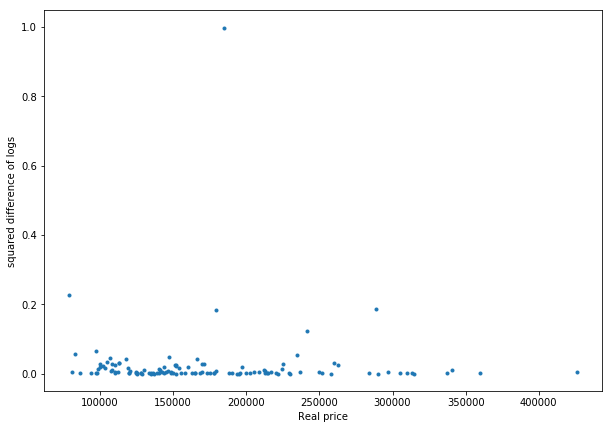

RMSE with 20 NN , average of the prices, outliers excluded : 0.14975437872280567


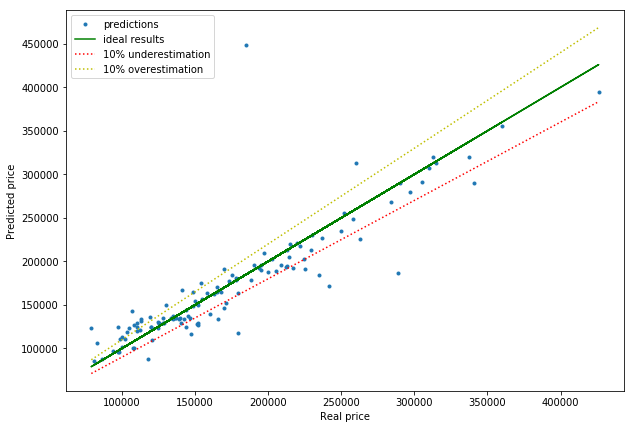

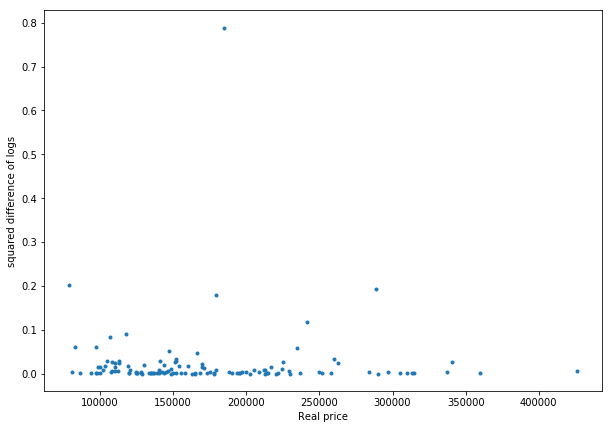

RMSE with 5 NN , median of the prices : 0.14000061912425954


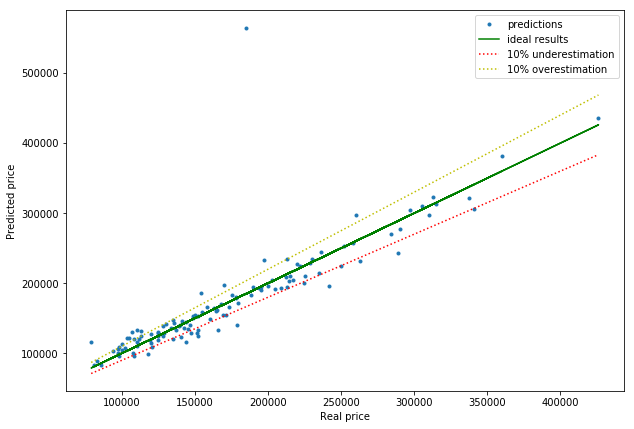

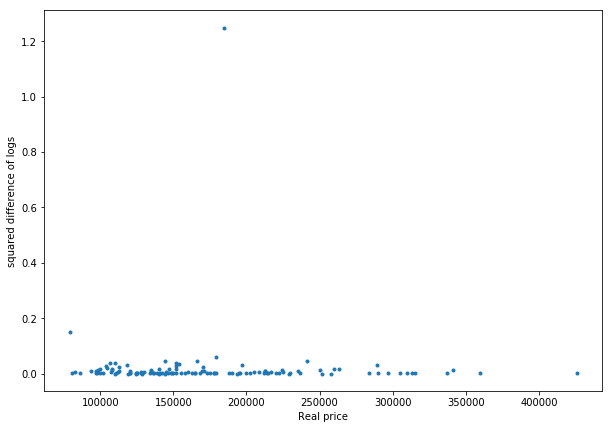

RMSE with 10 NN , median of the prices : 0.15253769004574175


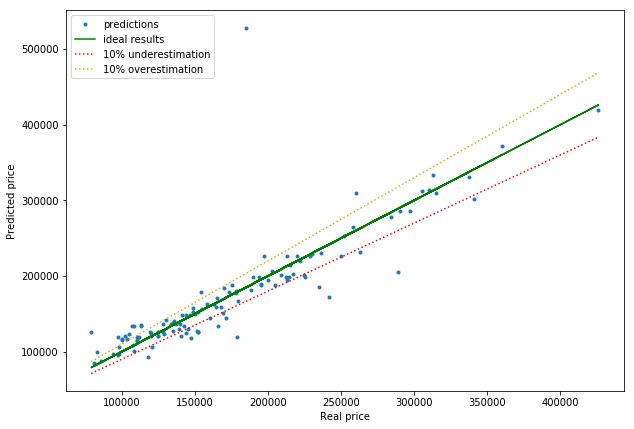

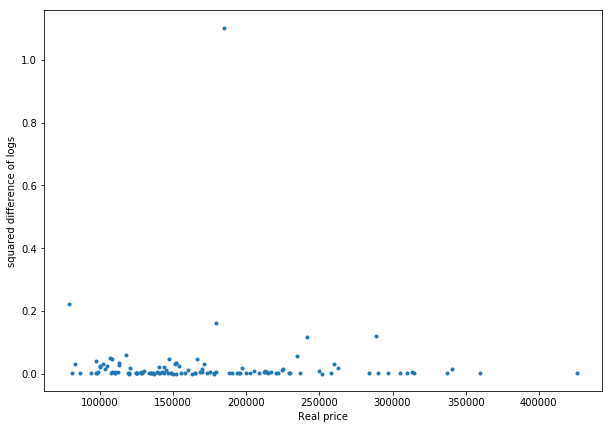

RMSE with 15 NN , median of the prices : 0.15149423762469802


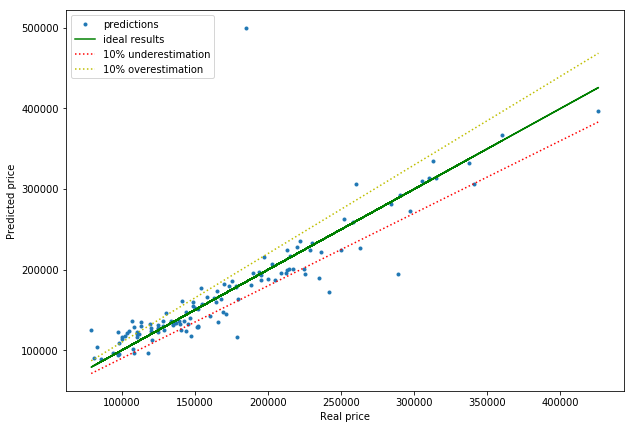

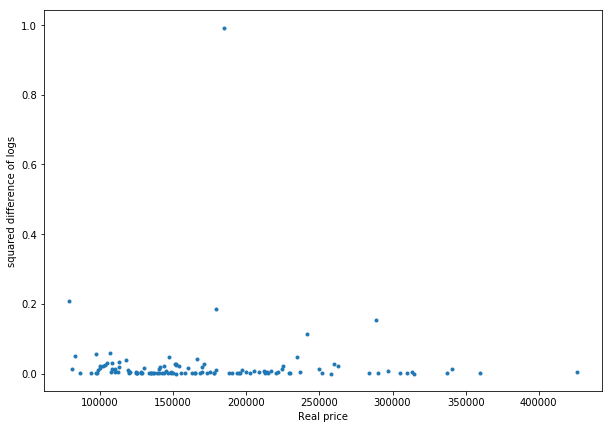

RMSE with 20 NN , median of the prices : 0.14953820228478282


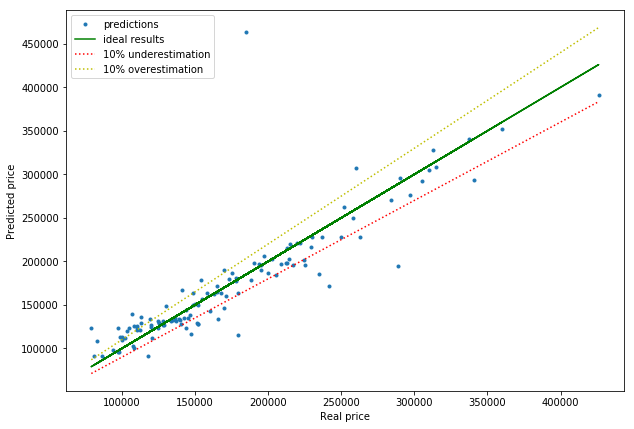

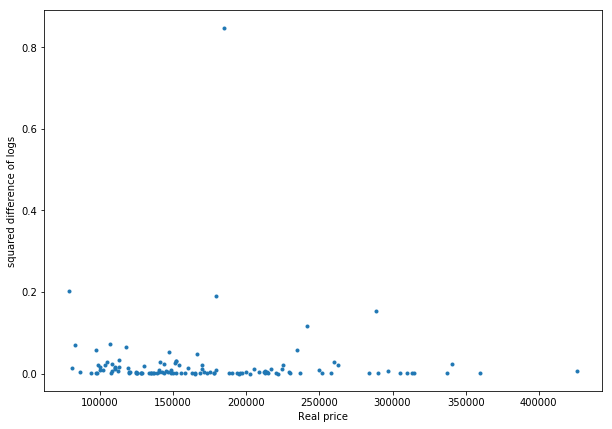

In [40]:
def show_results_KNN(Ks, data_set, validation_set, validationPrices):
    approximations = makePrediction(Ks, data_set, validation_set)
    
    for i in [0,1]:
        app = approximations[i]
        if i==1:
            method = 'median of the prices'
        else:
            method = 'average of the prices, outliers excluded'
        for k in range(len(app)):
            approximation = app[k]
            print("RMSE with" , Ks[k], "NN ,", method, ":" , get_error(approximation, validation))
            ploterror(approximation, validationPrices)
            list_of_errors = get_error(approximation, validationPrices, error_list = True)
            plot_errors(list_of_errors, validationPrices)
    
show_results_KNN([5,10,15,20], avgTrain, avgValidation, validationPrices)

<div class="alert alert-block alert-success">
We can observe that while most of the results are well predicted, some values are totally different from expected ones.
Thus, we can conclude that considering only the closest samples will not work as well as expected.
</div>

<div class="alert alert-info">
<h2> KNN & linear regression </h2> <br>
An idea can be to combine the two methods : selecting a medium amount of closest neighbour (ie 100) and make a linear regression on this dataset.
</div>

Item 0 on 120
Item 20 on 120
Item 40 on 120
Item 60 on 120
Item 80 on 120
Item 100 on 120
                           RMSE with KNN_regression: 0.31875691875318857                            


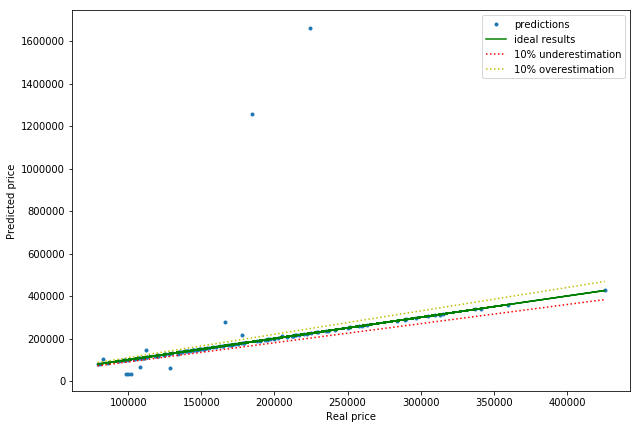

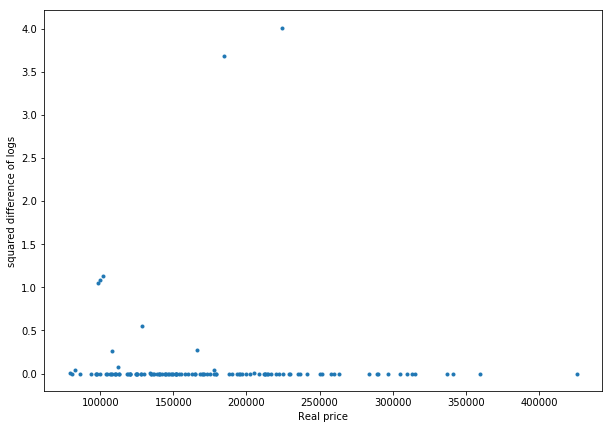

In [41]:
def KNN_regression(K, training_set, test_set):
    coeffs = getCoeffs(20, training_set)
    predictions = pd.DataFrame()
    for i in range (len(test_set)):
        if i%20==0: print('Item {0} on {1}'.format(i, len(test_set)))
        test_sample = test_set.iloc[i]
        nearestNeighbours = getKNearestNeighbours(K, training_set, test_sample, coeffs)
        nearestNeighboursIds = [row[0] for row in nearestNeighbours]
        pruned_training_set = training_set.iloc[nearestNeighboursIds]
        prediction = basic_linear_regression(pruned_training_set, pd.DataFrame([test_sample]), headers[:-1])
        predictions = pd.concat([predictions, prediction])
    return predictions

def show_results_KNN_LN(K, data_set, validation_set, validationPrices, show = True):
    approximation = KNN_regression(K, data_set, validation_set)
    if show:
        print("RMSE with {0}: {1}".format("KNN_regression", get_error(approximation, validationPrices)).center(100))
        ploterror(approximation, validationPrices)
        list_of_errors = get_error(approximation, validationPrices, error_list = True)
        plot_errors(list_of_errors, validationPrices)
    return get_error(approximation, validationPrices)

show_results_KNN_LN(50, avgTrain, avgValidation, validationPrices);

<div class="alert alert-block alert-success">
Even if some of the results are perfectly predicted, some other are to far away from their real values.

Thus, even if this model can be really precise, it is not reliable.

</div>

<div class="alert alert-info">
<h2>Use of XGBoost using all headers</h2>

In order to compare our results to high level python libraries, we decided to use XGBoost:

</div>

In [42]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
train, validation = cleaned_data_set[:n], cleaned_data_set[n:]
validationPrices = validation[[headers[0], headers[-1]]]
avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
avgTrain = getAvgTrain(train)

                               RMSE with XGBoost: 0.12583231978926637                               


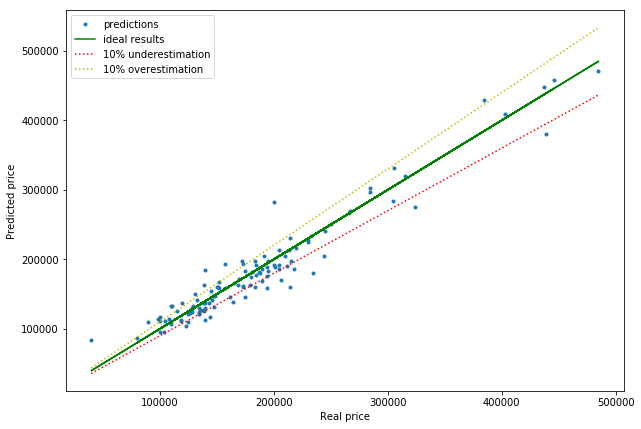

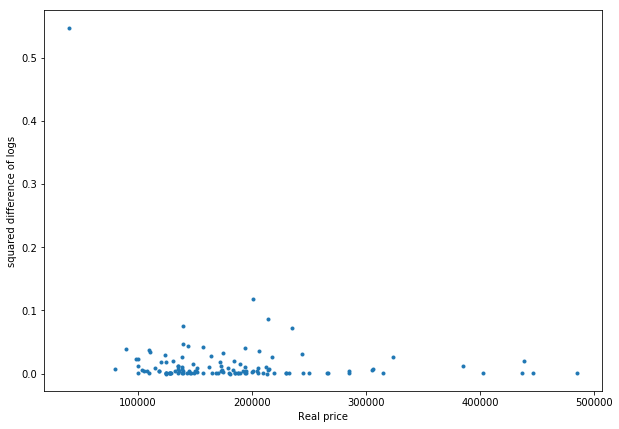

0.12583231978926637

In [43]:
default_params = {'max_depth':3,
        'min_child_weight':10,
        'learning_rate': 0.3,
        'subsample':0.5,
        'colsample_bytree':0.6,
        'obj':'reg:linear',
        'n_estimators': 1000,
        'eta':0.3}
def XGBoost(trainingSet, testingSet, headersToUse= [], params = default_params):
    
    features = trainingSet[headersToUse]
    target = trainingSet['SalePrice']
    dmatrix = xgb.DMatrix(features.values,
                         target.values,
                         feature_names=features.columns.values)
    clf = xgb.train(params, dmatrix)
    xgBoost_testing_set = testingSet.drop(['Id'], axis=1)
    dtest = xgb.DMatrix(xgBoost_testing_set, feature_names=xgBoost_testing_set.columns.values)
    ypred = clf.predict(dtest)
    L = [int(testingSet.iloc[i]['Id']) for i in range(len(xgBoost_testing_set))]
    return(pd.DataFrame.from_items([('Id', L), ('PredictedPrice', ypred)]))
    

show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], XGBoost)

In [44]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

Results = [[]]

T = 30
for i in range(T):
    if i%10==0: print('Iteration {0} on {1}'.format(i, T))
    cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
    train, validation = cleaned_data_set[:n], cleaned_data_set[n:]
    validationPrices = validation[[headers[0], headers[-1]]]
    avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
    avgTrain = getAvgTrain(train)
    Results[0].append(show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], XGBoost, False))
print('XGBoost results:', [mean(ele) for ele in Results])

Iteration 0 on 30
Iteration 10 on 30
Iteration 20 on 30
XGBoost results: [0.15784288666653898]


<div class="alert alert-block alert-success">

In this situation, XGBoost is effective, but it's not our best result: we obtained better results with linear regressions on pruned data.

Thus, we will try to train XGBoost on pruned data:

</div>

In [50]:
N = cleaned_data_set.shape[0]
ratio_train = 0.9
n = int(N*ratio_train)

Results = [[]]

T = 30
for i in range(T):
    if i%10==0: print('Iteration {0} on {1}'.format(i, T))
    cleaned_data_set = sklearn.utils.shuffle(cleaned_data_set)
    pruned_data_set = sklearn.utils.shuffle(pruned_data_set)
    train, validation = pruned_data_set[:n], cleaned_data_set[n:]
    validationPrices = validation[[headers[0], headers[-1]]]
    avgValidation = dataframePreprocessing(validation.drop(headers[-1], 1))
    avgTrain = getAvgTrain(train)
    Results[0].append(show_results(avgTrain, avgValidation, validationPrices, headers[1:-1], XGBoost, False))
print('XGBoost results with pruned_training_set:', [mean(ele) for ele in Results])

Iteration 0 on 30
Iteration 10 on 30
Iteration 20 on 30
XGBoost results with pruned_training_set: [0.14327955653218788]


<div class="alert alert-block alert-success">

Even if the results of XGBoost on qverage is pretty good, it is not better than the results of linear regression trained on pruned data.

</div>

<div class="alert alert-danger">
<h1>Conclusion:</h1>
</div>

<div class="alert alert-block alert-success">

Our better results have been obtained with the upgraded <strong>linear regression on all headers</strong> train on <strong> pruned data</strong>.<br>

That is why we will use it to predict the price of houses in the test set.
</div>

In [53]:
train = prune_data_set(cleaned_data_set, 20, 0.18)
avgTest = dataframePreprocessing(cleaned_test_set)
avgTrain = getAvgTrain(train)

prediction_dataset = linear_regression(avgTrain, avgTest, headers[1:-1])


We take back 5 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 4 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 3 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 0 outlier(s) at this stage
We take back 1 outlier(s) at this stage
We take back 2 outlier(s) at this stage
We take back 1 outlier(s) at this stage


In [54]:
def submit(predictions):
    '''
    Submits the results in prediction in the format:
    {Id}, {PredictedPrice}
    '''
    output = open('results.csv', 'w')
    output.write('Id,SalePrice\n')
    for i in range(len(predictions)):
        ID = int(predictions.iloc[i]['Id'])
        predicted_price = float(predictions.loc[predictions['Id']==ID]['PredictedPrice'])
        output.write("{0},{1}\n".format(ID, predicted_price))
    return

In [55]:
submit(prediction_dataset)

<div class="alert alert-block alert-success">
Now, let's plot the price distribution of our predicted dataset, so as to compare it to the one plotted from data_set
</div>

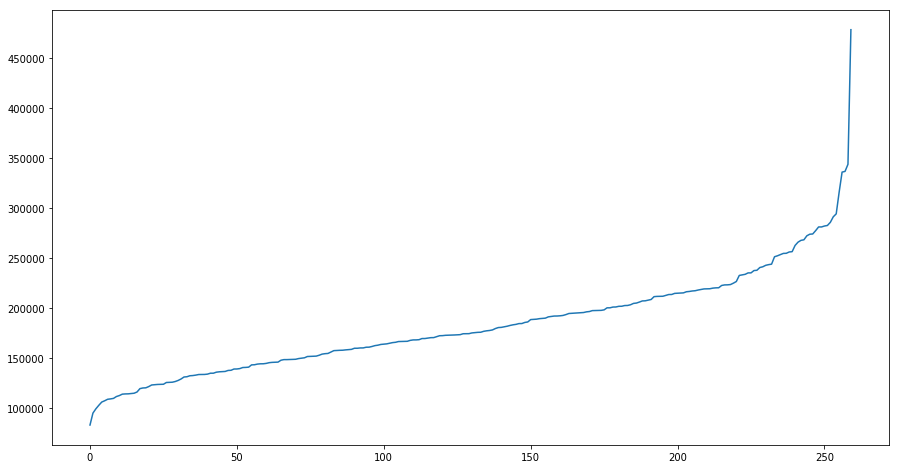

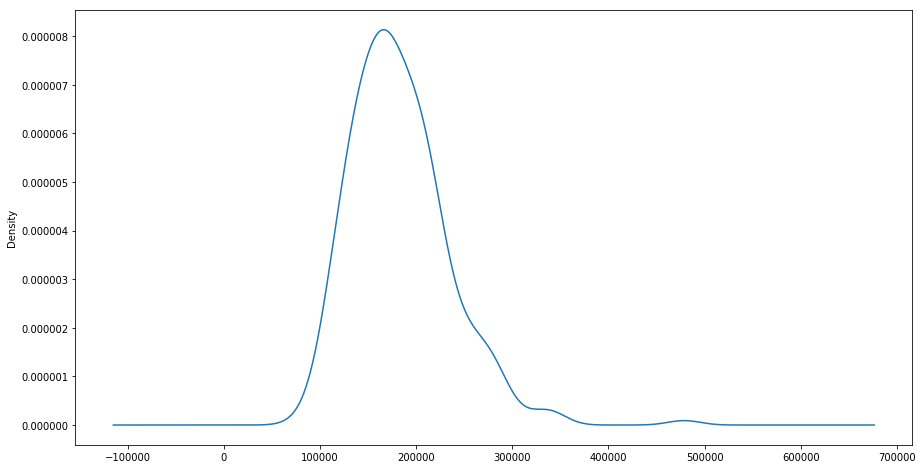

In [56]:
prices = prediction_dataset['PredictedPrice']

cumPrices = prices.sort_values()
plt.figure(figsize = (15,8))
plt.title = ("ff")
plt.plot(range(len(prices)),cumPrices)
plt.figure(figsize = (15,8))
prices.plot.density()

<div class="alert alert-block alert-success">
We can see that the statistics looks like the one from the training set, except for some points.

</div>